Blog Post: https://medium.com/@phuong_truong/classifying-reuters-newswire-topics-with-recurrent-neural-network-6b1a14b1804a

In [92]:
import keras
keras.__version__

'2.1.5'

In [93]:
#prepping the data
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

#one hot encode labes
one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)

#train test
partial_x_train = input_train

partial_y_train = one_hot_train_labels

#train test
x_test = input_test

y_test = one_hot_test_labels


Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
input_train shape: (8982, 500)
input_test shape: (2246, 500)


In [ ]:
#fitting the model
from keras.layers import Dense
from keras.layers import LSTM


model = Sequential()
model.add(Embedding(max_features, 100))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(LSTM(32))
model.add(layers.Dropout(0.5))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=.2)

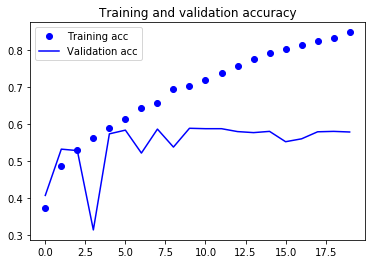

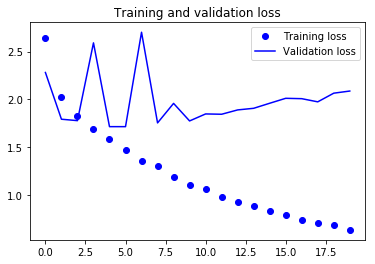

In [81]:
#accuracy vs. the number of epochs

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [96]:
#final model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
model.fit(partial_x_train, partial_y_train,
          epochs=5, batch_size=128, validation_split=.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/5
7185/7185 [==============================] - 74s 10ms/step - loss: 2.6802 - acc: 0.3947 - val_loss: 2.1188 - val_acc: 0.4969
Epoch 2/5
7185/7185 [==============================] - 72s 10ms/step - loss: 2.0823 - acc: 0.4864 - val_loss: 1.8620 - val_acc: 0.4953
Epoch 3/5
7185/7185 [==============================] - 72s 10ms/step - loss: 1.8694 - acc: 0.5223 - val_loss: 2.4223 - val_acc: 0.3873
Epoch 4/5
7185/7185 [==============================] - 72s 10ms/step - loss: 1.7675 - acc: 0.5422 - val_loss: 1.6977 - val_acc: 0.5620
Epoch 5/5
7185/7185 [==============================] - 71s 10ms/step - loss: 1.6036 - acc: 0.5699 - val_loss: 1.6638 - val_acc: 0.5520


In [97]:
#test model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Accuracy:', test_acc)

2246/2246 [==============================] - 11s 5ms/step
Accuracy: 0.553873552983081
